In [1]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

<AxesSubplot:>

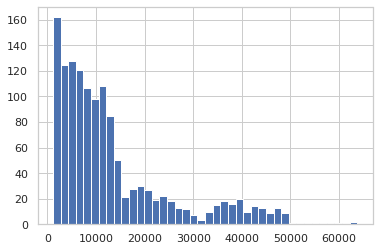

In [4]:
df.charges.hist(bins=40)

In [5]:
df[df.charges>50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [6]:
df=df[df.charges<50000]

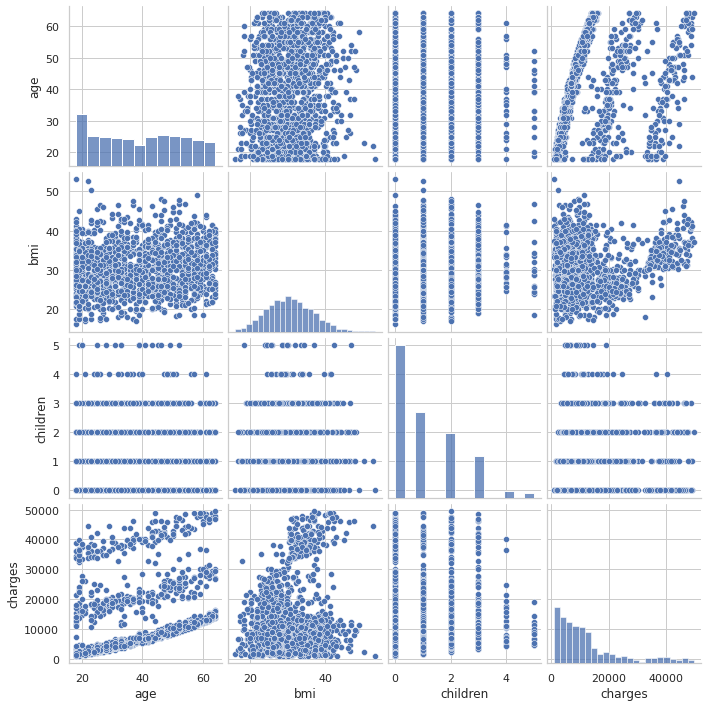

In [7]:
import matplotlib.pyplot as plt
sns.pairplot(df, height=2.5)
plt.show()

<AxesSubplot:>

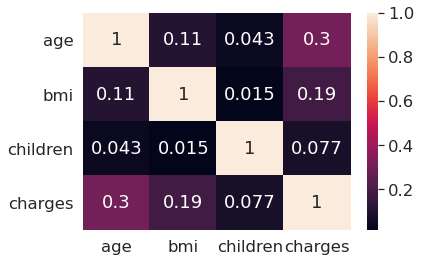

In [8]:
import numpy as np
numeric_cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

In [9]:
df = pd.get_dummies(df, columns=['sex','smoker', 'region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
x_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

x = df[x_cols].values
y = df[y_col].values

x_train, x_test, y_train, y_test = train_test_split(x,y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [12]:
y_pred.shape

(333, 1)

In [13]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2: ", r2.round(4))
print("mse: ", mse.round(4))

r2:  0.775
mse:  0.2384


In [14]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [15]:
y_test = y_test.reshape(-1)

print("==============Summary==============")
stats.summary(model, x_test, y_test, x_cols)

==============Summary==============
Residuals:
    Min      1Q  Median     3Q    Max
-1.8803 -0.0771  0.0844 0.2184 0.9534


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.001403    0.026827  -0.0523  0.958336
smoker_yes        0.788342    0.026290  29.9869  0.000000
region_northwest -0.004117    0.031201  -0.1320  0.895102
region_southwest -0.025410    0.030566  -0.8313  0.406387
region_southeast -0.035938    0.031798  -1.1302  0.259205
children          0.052214    0.027039   1.9311  0.054322
sex_male         -0.004581    0.027154  -0.1687  0.866142
age               0.305272    0.028409  10.7457  0.000000
bmi               0.151687    0.028405   5.3401  0.000000
---
R-squared:  0.77496,    Adjusted R-squared:  0.76940
F-statistic: 139.46 on 8 features


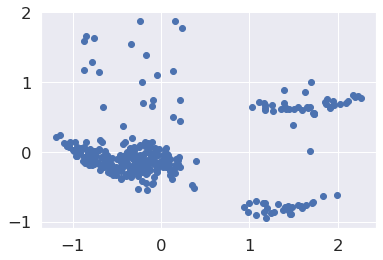

In [16]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

In [17]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >=30).astype(int)
df_second['sobrepesofumador'] = df_second.sobrepeso * df_second.smoker_yes

In [18]:
x_cols = list(set(df_second.columns)-set(['charges']))
y_col = ['charges']

x = df_second[x_cols].values
y = df_second[y_col].values

x_train, x_test, y_train, y_test = train_test_split(x,y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [19]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2: ", r2.round(4))
print("mse: ", mse.round(4))

r2:  0.8616
mse:  0.1542


In [20]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [21]:
y_test = y_test.reshape(-1)

print("==============Summary==============")
stats.summary(model, x_test, y_test, x_cols)

==============Summary==============
Residuals:
    Min    1Q  Median     3Q    Max
-1.8951 0.047  0.0975 0.1257 1.4404


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.005167    0.021623  -0.2390  0.811291
smoker_yes        0.458718    0.028030  16.3652  0.000000
sobrepeso        -0.033953    0.033342  -1.0183  0.309255
region_northwest -0.005646    0.024414  -0.2313  0.817253
region_southwest -0.031228    0.025996  -1.2013  0.230497
region_southeast -0.026270    0.026023  -1.0095  0.313475
children          0.066778    0.022276   2.9977  0.002925
sobrepesofumador  0.498756    0.028810  17.3116  0.000000
sex_male         -0.019380    0.021831  -0.8878  0.375314
age              -0.074533    0.109088  -0.6832  0.494935
bmi               0.053144    0.030940   1.7176  0.086796
age2              0.388863    0.111991   3.4723  0.000584
---
R-squared:  0.86164,    Adjusted R-squared:  0.85690
F-statistic: 181.73 on 11 features


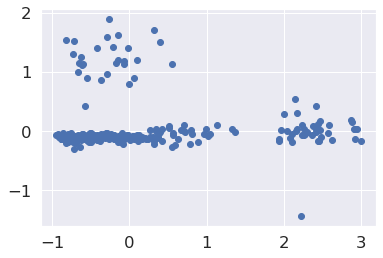

In [22]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

In [33]:
x_cols = ['age2','sobrepesofumador', 'smoker_yes', 'children']
y_col = ['charges']

x = df_second[x_cols].values
y = df_second[y_col].values

x_train, x_test, y_train, y_test = train_test_split(x,y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [34]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2: ", r2.round(4))
print("mse: ", mse.round(4))

r2:  0.8526
mse:  0.1394


In [36]:
model.coef_ = model.coef_.reshape(-1)

In [37]:
y_test = y_test.reshape(-1)

print("==============Summary==============")
stats.summary(model, x_test, y_test, x_cols)

==============Summary==============
Residuals:
    Min    1Q  Median     3Q    Max
-1.9183 0.075  0.1147 0.1459 0.4319


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.000000    0.020537   0.0000  1.000000
age2              0.322849    0.020499  15.7496  0.000000
sobrepesofumador  0.489749    0.026074  18.7833  0.000000
smoker_yes        0.466123    0.025449  18.3160  0.000000
children          0.072486    0.019945   3.6344  0.000323
---
R-squared:  0.85259,    Adjusted R-squared:  0.85080
F-statistic: 474.28 on 4 features


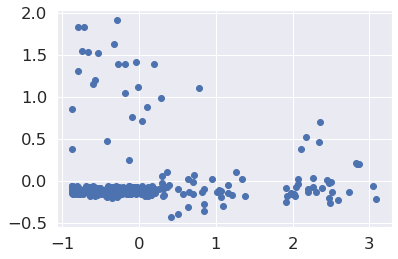

In [38]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()